In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
file_path = r"C:\Users\Sarayu Polepalli\OneDrive\Desktop\Data\AeroReach Insights.csv"
appl_data=pd.read_csv(file_path)

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Sarayu Polepalli\OneDrive\Desktop\Data\AeroReach Insights.csv")
data=df.copy()
# Show the first few rows
print(df.head())

# Basic Info
print("\n--- Data Info ---")
print(df.info())

# Summary Statistics
print("\n--- Data Description ---")
print(df.describe())

#summary for categorical columns
print("\n--- Categorical Description ---")
print(df.describe(include='object'))

#check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

    UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_p

In [3]:
import pandas as pd

# Make a copy
data_cleaned = data.copy()

# 1. Numeric columns - Fill missing with median
num_cols_to_fill = [
    'Yearly_avg_view_on_travel_page',
    'total_likes_on_outstation_checkin_given',
    'Yearly_avg_comment_on_travel_page'
]

for col in num_cols_to_fill:
    median_value = data_cleaned[col].median()
    data_cleaned[col] = data_cleaned[col].fillna(median_value)

# 2. Convert 'yearly_avg_Outstation_checkins' to numeric
data_cleaned['yearly_avg_Outstation_checkins'] = pd.to_numeric(
    data_cleaned['yearly_avg_Outstation_checkins'], errors='coerce'
)

# Fill missing with median after conversion
yearly_avg_checkins_median = data_cleaned['yearly_avg_Outstation_checkins'].median()
data_cleaned['yearly_avg_Outstation_checkins'] = data_cleaned['yearly_avg_Outstation_checkins'].fillna(
    yearly_avg_checkins_median
)

# 3. Categorical columns - Fill missing with mode
cat_cols_to_fill = [
    'preferred_device',
    'preferred_location_type',
    'following_company_page'
]

for col in cat_cols_to_fill:
    mode_value = data_cleaned[col].mode()[0]
    data_cleaned[col] = data_cleaned[col].fillna(mode_value)

# 4. Double-check missing values
missing_after_cleaning = data_cleaned.isnull().sum()

# Show only columns with missing values (should be none)
print(missing_after_cleaning[missing_after_cleaning > 0])


Series([], dtype: int64)


In [4]:
# Impute missing values

# Numeric columns -> median
num_cols_to_fill = ['Yearly_avg_view_on_travel_page',
                    'total_likes_on_outstation_checkin_given',
                    'Yearly_avg_comment_on_travel_page']

for col in num_cols_to_fill:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

# Categorical columns -> mode
cat_cols_to_fill = ['preferred_device',
                    'preferred_location_type',
                    'following_company_page']

for col in cat_cols_to_fill:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

# Special treatment
data_cleaned['yearly_avg_Outstation_checkins'] = pd.to_numeric(data_cleaned['yearly_avg_Outstation_checkins'], errors='coerce')
data_cleaned['yearly_avg_Outstation_checkins'] = data_cleaned['yearly_avg_Outstation_checkins'].fillna(
    data_cleaned['yearly_avg_Outstation_checkins'].median())

In [5]:
# 1. Check all columns' data types
data_types = data_cleaned.dtypes

# 2. Investigate suspicious values in 'Adult_flag'
adult_flag_values = data_cleaned['Adult_flag'].value_counts()

data_types, adult_flag_values

(UserID                                            int64
 Taken_product                                    object
 Yearly_avg_view_on_travel_page                  float64
 preferred_device                                 object
 total_likes_on_outstation_checkin_given         float64
 yearly_avg_Outstation_checkins                  float64
 member_in_family                                 object
 preferred_location_type                          object
 Yearly_avg_comment_on_travel_page               float64
 total_likes_on_outofstation_checkin_received      int64
 week_since_last_outstation_checkin                int64
 following_company_page                           object
 montly_avg_comment_on_company_page                int64
 working_flag                                     object
 travelling_network_rating                         int64
 Adult_flag                                        int64
 Daily_Avg_mins_spend_on_traveling_page            int64
 dtype: object,
 Adult_flag
 0 

In [6]:
#fixing Adult_flag
data_cleaned['Adult_flag'] = data_cleaned['Adult_flag'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

#fixing member_in_family
data_cleaned['member_in_family'] = pd.to_numeric(data_cleaned['member_in_family'], errors='coerce')

#conversion to numeric
member_median = data_cleaned['member_in_family'].median()
data_cleaned['member_in_family'] = data_cleaned['member_in_family'].fillna(member_median)

#final check
print(data_cleaned['Adult_flag'].value_counts())
print(data_cleaned['member_in_family'].isnull().sum())

Adult_flag
1    6712
0    5048
Name: count, dtype: int64
0


In [7]:
from sklearn.preprocessing import LabelEncoder

# Work on cleaned dataset
data_encoded = data_cleaned.copy()

# Identify categorical columns
cat_cols = data_encoded.select_dtypes(include='object').columns

# Separate binary and non-binary categorical columns
binary_cols = [col for col in cat_cols if data_encoded[col].nunique() == 2]
multi_class_cols = [col for col in cat_cols if data_encoded[col].nunique() > 2]

# Label Encode binary columns
le = LabelEncoder()
for col in binary_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# One-Hot Encode multi-class categorical columns
data_encoded = pd.get_dummies(data_encoded, columns=multi_class_cols, drop_first=True)

# Show encoded data shape
print("Shape after encoding:", data_encoded.shape)

Shape after encoding: (11760, 40)


In [8]:
# Apply One-Hot Encoding only to non-binary categorical columns
multi_class_cols = [col for col in cat_cols if data_cleaned[col].nunique() > 2]

# Apply One-Hot Encoding on cleaned data
data_encoded = pd.get_dummies(data_cleaned, columns=multi_class_cols, drop_first=True)

# Show final encoded shape
print("Final shape after One-Hot Encoding:", data_encoded.shape)

Final shape after One-Hot Encoding: (11760, 40)


In [9]:
# Check and drop duplicates
duplicates = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    data_cleaned = data_cleaned.drop_duplicates()
    print("Duplicate rows dropped.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


C:\Users\Sarayu Polepalli\AppData\Local\Temp\ipykernel_20884\3310957311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_device', data=data_cleaned, palette='Set2')


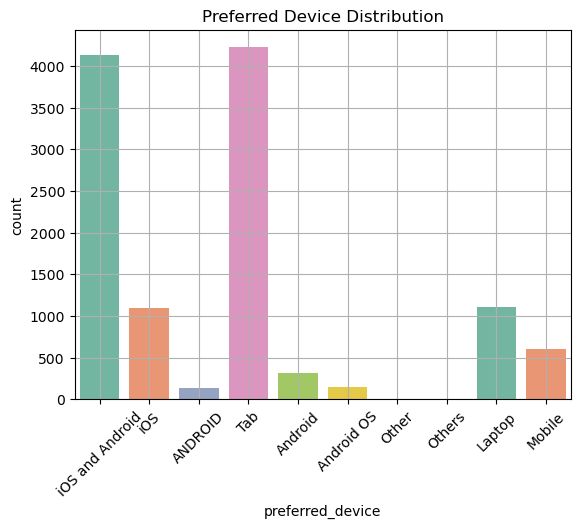

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot before encoding
sns.countplot(x='preferred_device', data=data_cleaned, palette='Set2')
plt.title('Preferred Device Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

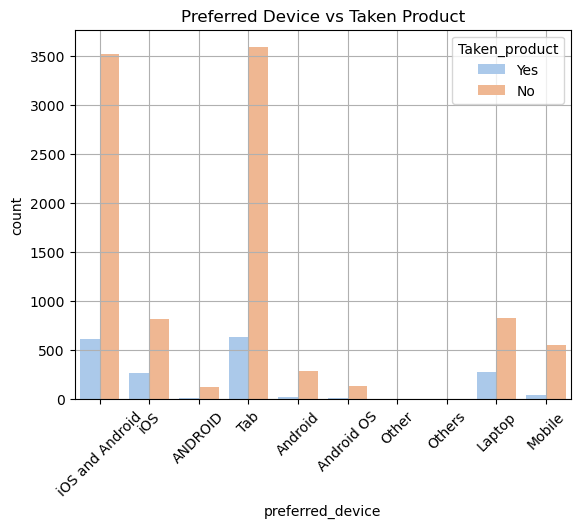

In [11]:
sns.countplot(x='preferred_device', hue='Taken_product', data=data_cleaned, palette='pastel')
plt.title('Preferred Device vs Taken Product')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# exploratory data analysis

In [12]:
#check data quality
print("Checking for any remaining issues before EDA")

# Null values
null_values = data_cleaned.isnull().sum()
print("Null values in each column:\n", null_values)

# Duplicates (just check, don’t drop here)
duplicates = data_cleaned.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Checking for any remaining issues before EDA
Null values in each column:
 UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64
Duplicate rows: 0


In [13]:
# Example: Check invalid values in 'member_in_family'
invalid_family = data_cleaned[data_cleaned['member_in_family'] < 0]
print(f"Number of invalid family size entries: {invalid_family.shape[0]}")

Number of invalid family size entries: 0


In [14]:
# Detect outliers based on standard deviation
from scipy import stats

# Select numeric columns
numeric_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['UserID', 'Cluster', 'Taken_product_flag']]

# Z-score method
z_scores = np.abs(stats.zscore(data_cleaned[numeric_cols]))
outliers_std = (z_scores > 3).sum(axis=0)
print("Outliers detected using Standard Deviation method:\n")
print(pd.Series(outliers_std, index=numeric_cols))

Outliers detected using Standard Deviation method:

Yearly_avg_view_on_travel_page                    9
total_likes_on_outstation_checkin_given           4
yearly_avg_Outstation_checkins                    0
member_in_family                                 11
Yearly_avg_comment_on_travel_page                40
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
montly_avg_comment_on_company_page              191
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page           30
dtype: int64


In [15]:
total_rows = data_cleaned.shape[0]
outlier_percent = ((z_scores > 3).sum(axis=0) / total_rows * 100).round(2)
print("\nPercentage of Outliers:\n")
print(pd.Series(outlier_percent, index=numeric_cols))


Percentage of Outliers:

Yearly_avg_view_on_travel_page                  0.08
total_likes_on_outstation_checkin_given         0.03
yearly_avg_Outstation_checkins                  0.00
member_in_family                                0.09
Yearly_avg_comment_on_travel_page               0.34
total_likes_on_outofstation_checkin_received    0.00
week_since_last_outstation_checkin              0.00
montly_avg_comment_on_company_page              1.62
travelling_network_rating                       0.00
Adult_flag                                      0.00
Daily_Avg_mins_spend_on_traveling_page          0.26
dtype: float64


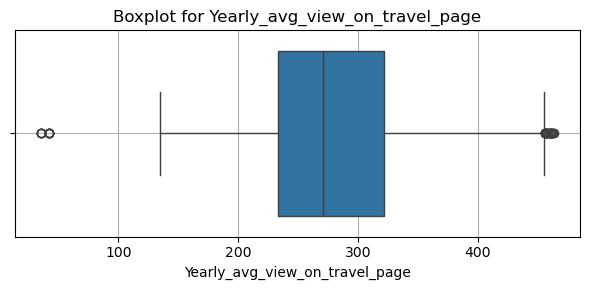

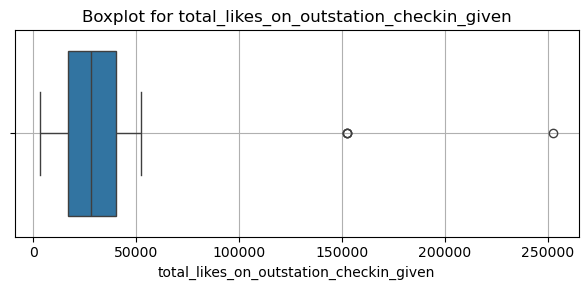

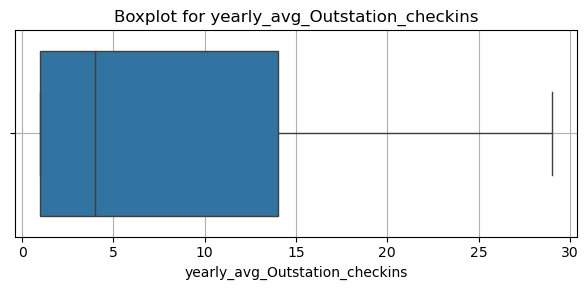

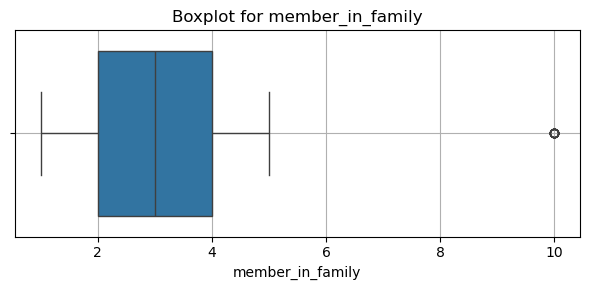

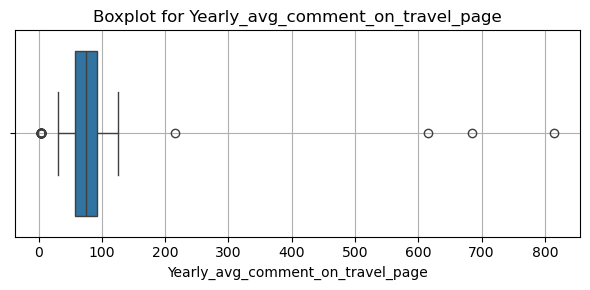

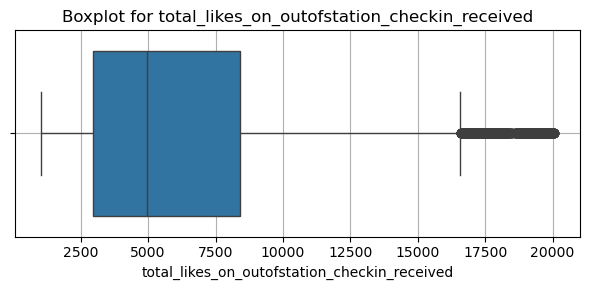

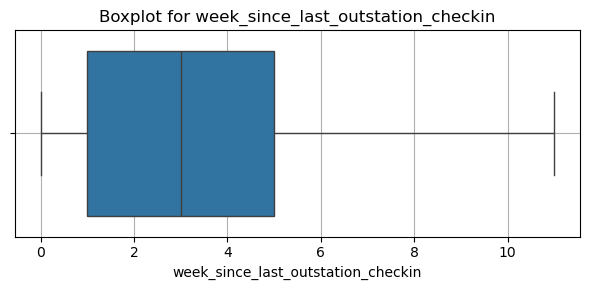

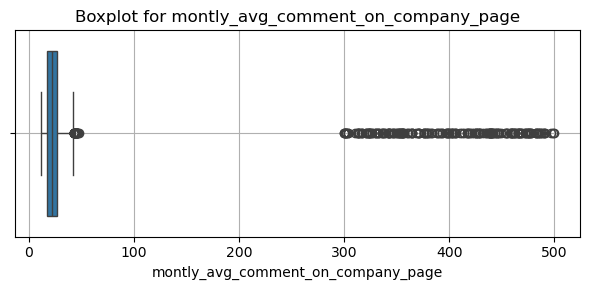

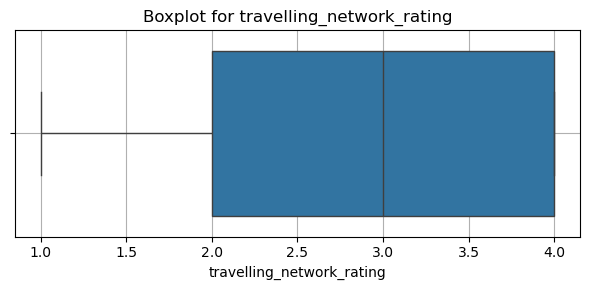

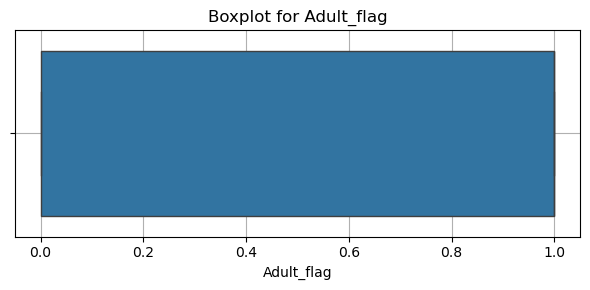

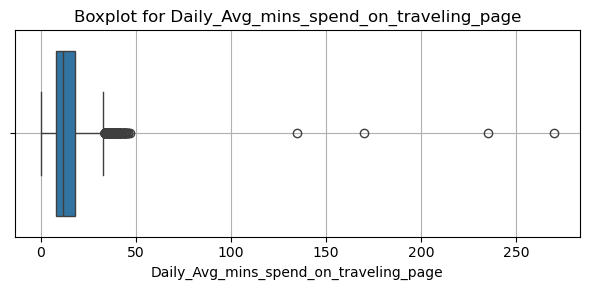

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data_cleaned[col])
    plt.title(f'Boxplot for {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

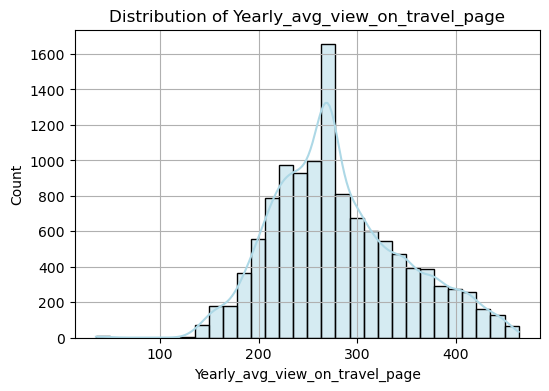

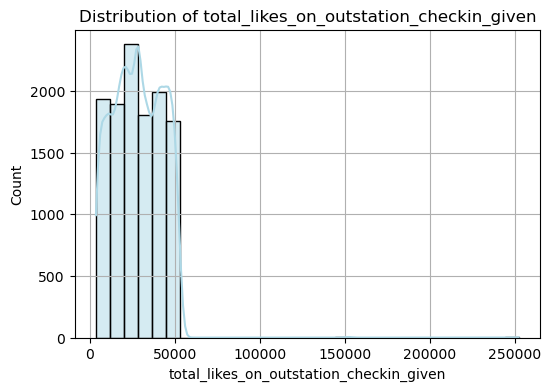

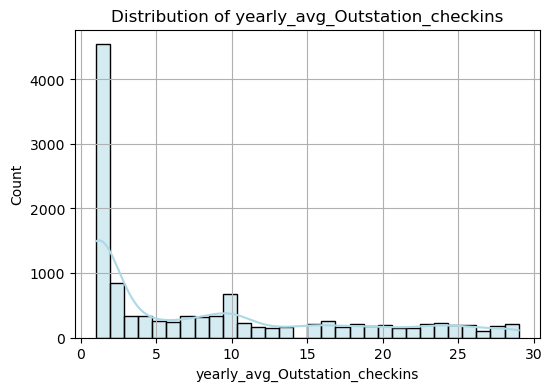

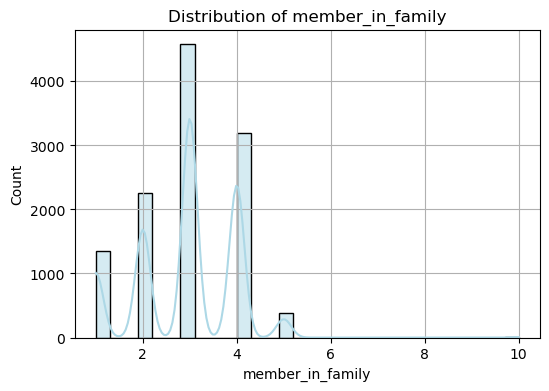

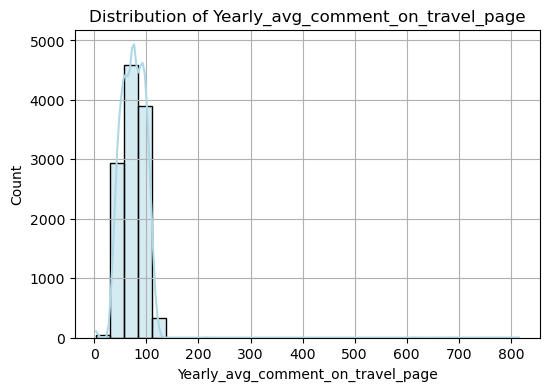

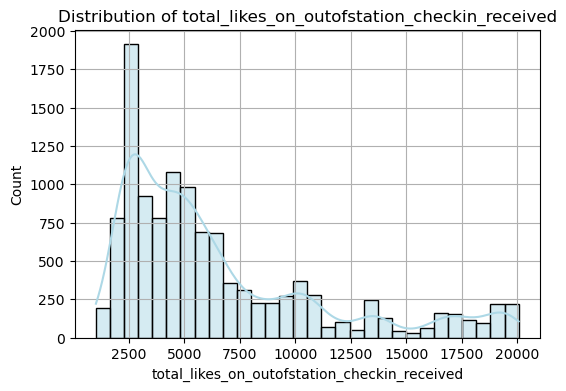

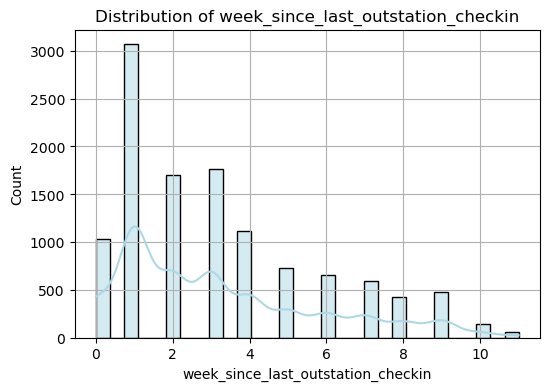

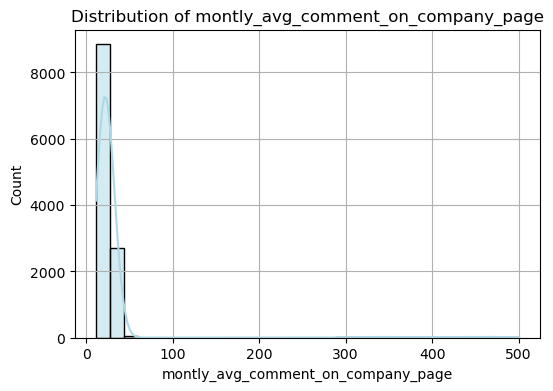

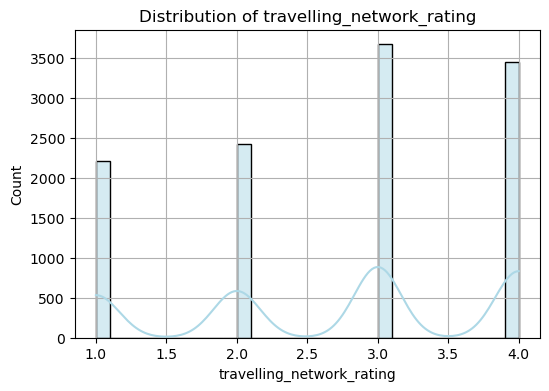

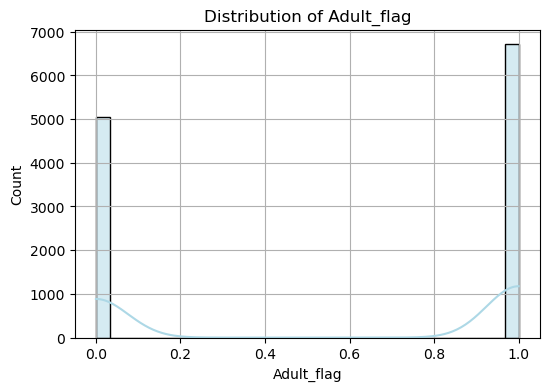

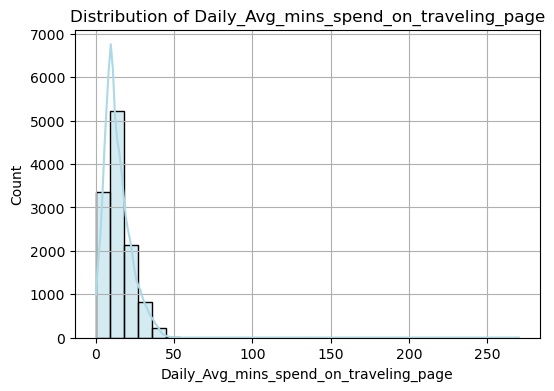

C:\Users\Sarayu Polepalli\AppData\Local\Temp\ipykernel_30012\2353038986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_cleaned, palette='Set2')


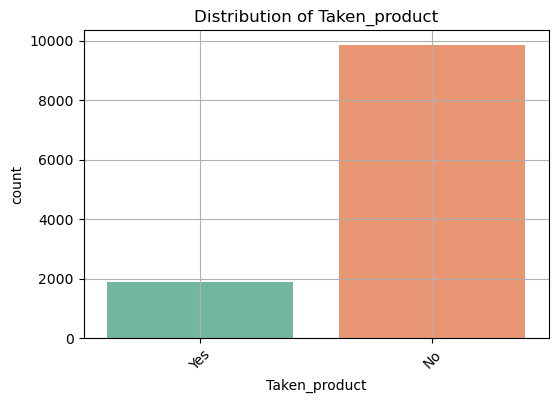

C:\Users\Sarayu Polepalli\AppData\Local\Temp\ipykernel_30012\2353038986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_cleaned, palette='Set2')


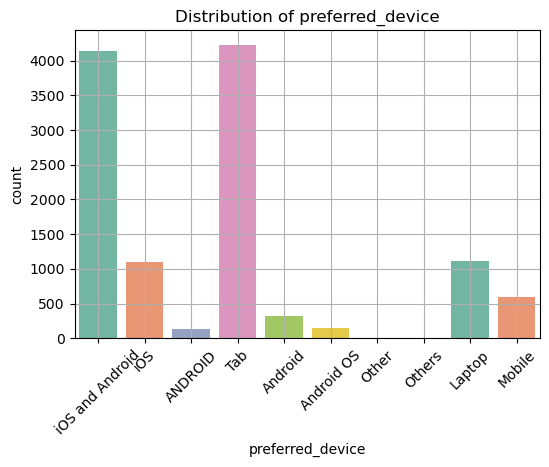

C:\Users\Sarayu Polepalli\AppData\Local\Temp\ipykernel_30012\2353038986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_cleaned, palette='Set2')


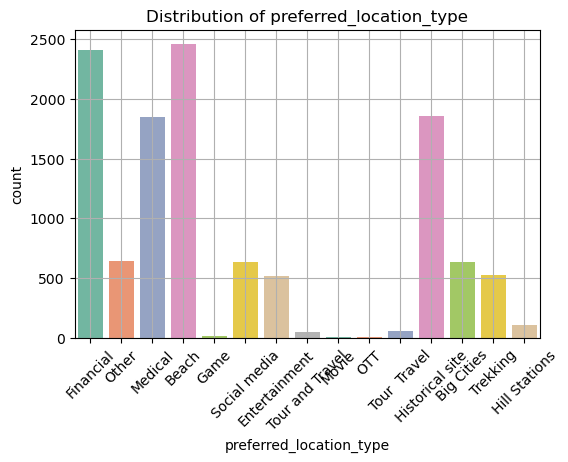

C:\Users\Sarayu Polepalli\AppData\Local\Temp\ipykernel_30012\2353038986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_cleaned, palette='Set2')


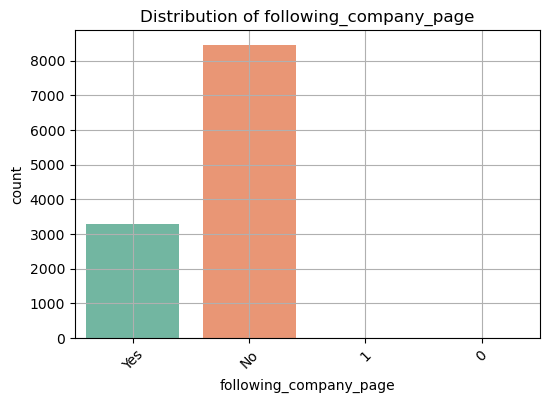

C:\Users\Sarayu Polepalli\AppData\Local\Temp\ipykernel_30012\2353038986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_cleaned, palette='Set2')


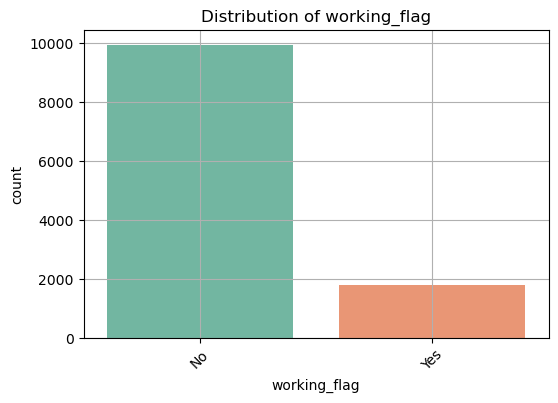

In [17]:
# Univariate - Numeric Features
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_cleaned[col], kde=True, bins=30, color='lightblue')
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()

# Univariate - Categorical Features
categorical_cols = data_cleaned.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data_cleaned, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

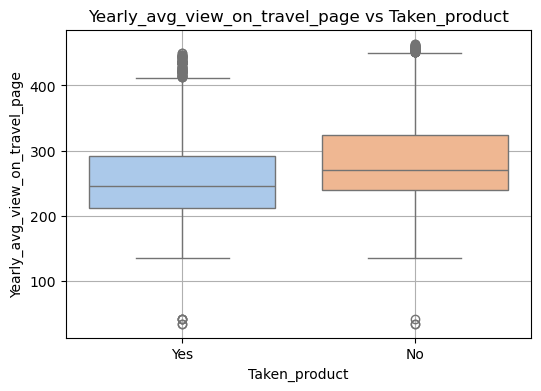

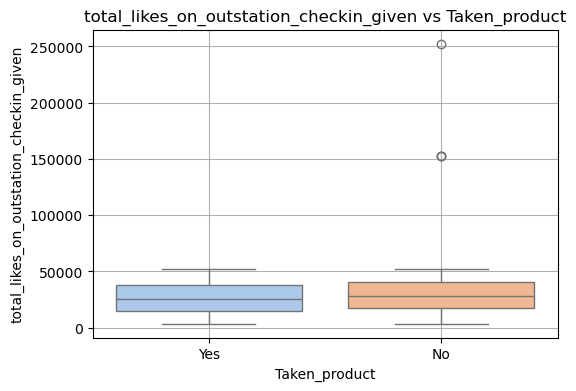

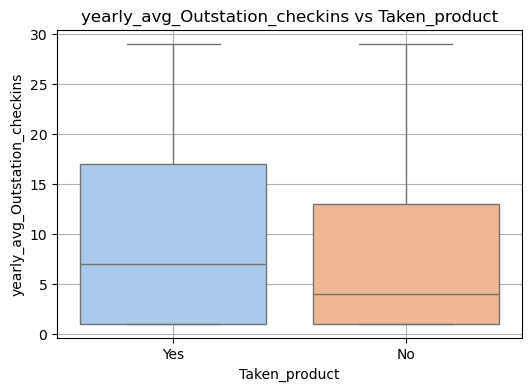

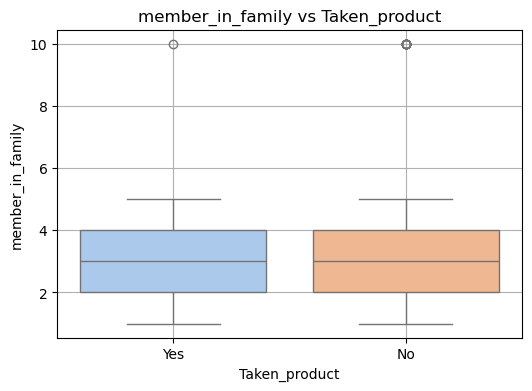

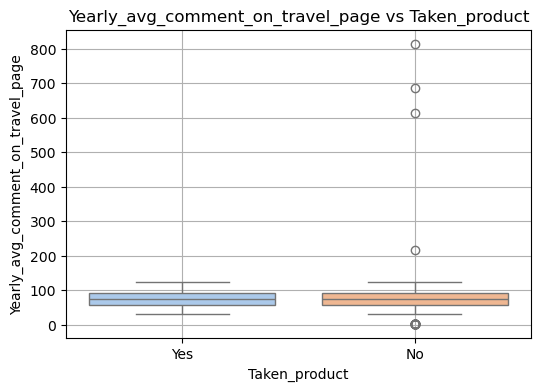

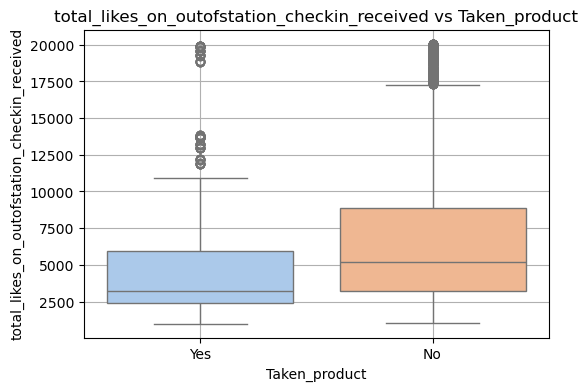

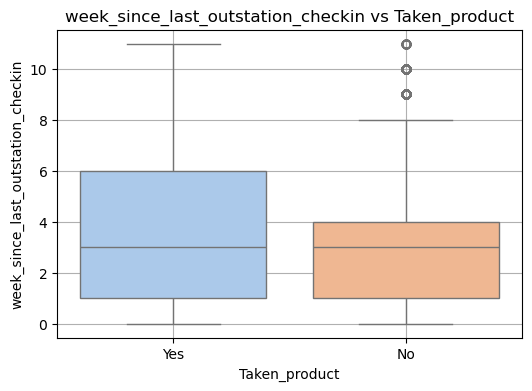

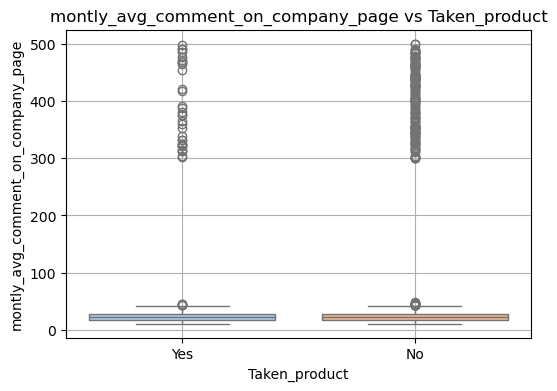

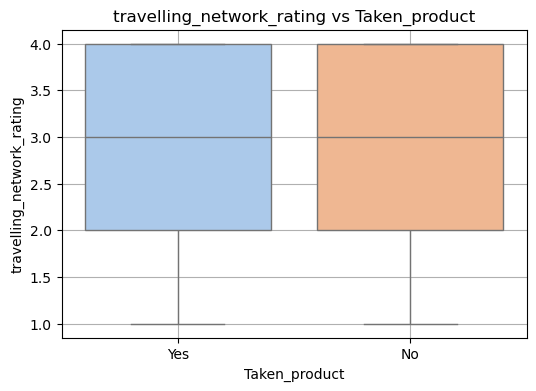

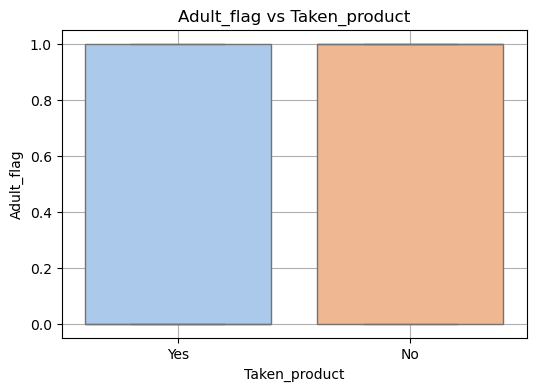

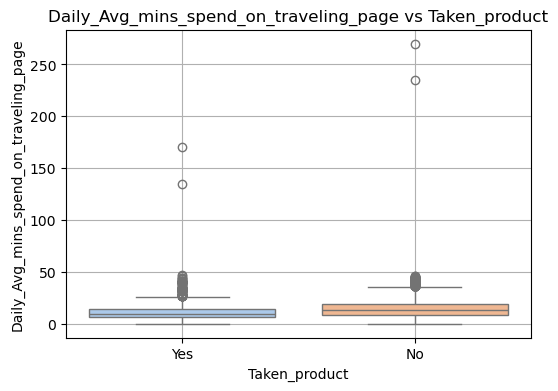

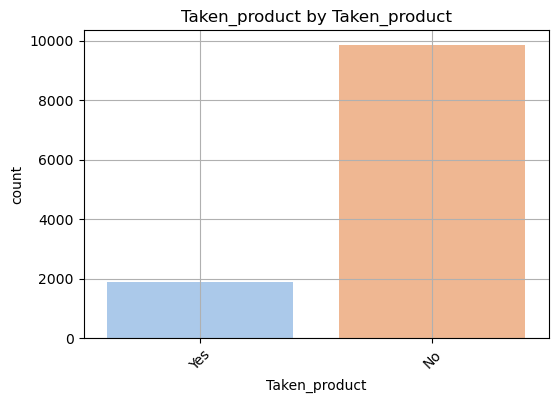

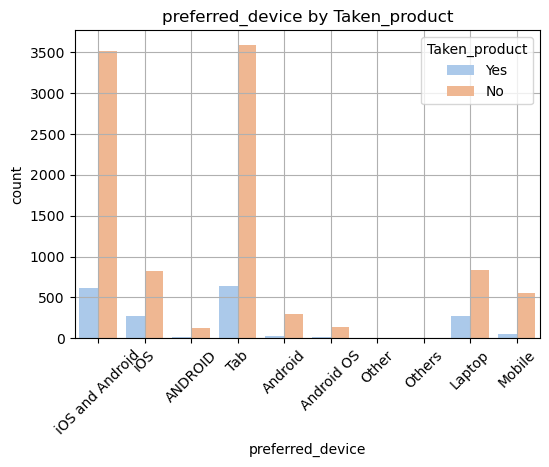

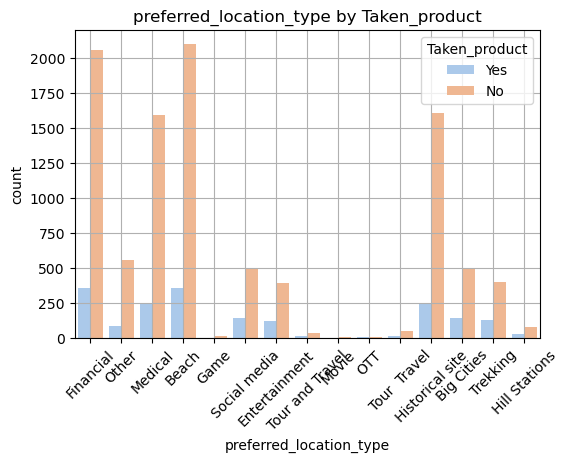

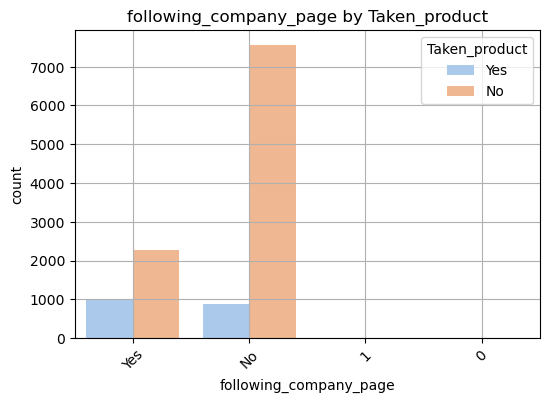

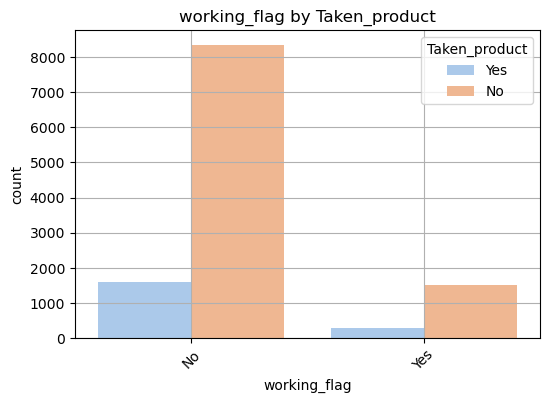

In [18]:
# Bivariate - Numeric vs Target
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Taken_product', y=col, hue='Taken_product', data=data_cleaned, palette='pastel', dodge=False, legend=False)
    plt.title(f'{col} vs Taken_product')
    plt.grid(True)
    plt.show()

# Bivariate - Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Taken_product', data=data_cleaned, palette='pastel')
    plt.title(f'{col} by Taken_product')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [19]:
# IQR method
print("\nOutliers detected using IQR method:\n")
for col in numeric_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = data_cleaned[(data_cleaned[col] < (Q1 - 1.5 * IQR)) | (data_cleaned[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {outliers_iqr.shape[0]} outliers")


Outliers detected using IQR method:

Yearly_avg_view_on_travel_page: 29 outliers
total_likes_on_outstation_checkin_given: 4 outliers
yearly_avg_Outstation_checkins: 0 outliers
member_in_family: 11 outliers
Yearly_avg_comment_on_travel_page: 40 outliers
total_likes_on_outofstation_checkin_received: 916 outliers
week_since_last_outstation_checkin: 0 outliers
montly_avg_comment_on_company_page: 242 outliers
travelling_network_rating: 0 outliers
Adult_flag: 0 outliers
Daily_Avg_mins_spend_on_traveling_page: 350 outliers


In [20]:
data_cleaned['engagement_score'] = (
    data_cleaned['Yearly_avg_view_on_travel_page'] +
    data_cleaned['Yearly_avg_comment_on_travel_page'] +
    data_cleaned['Daily_Avg_mins_spend_on_traveling_page']
)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Select features for clustering
cluster_features = ['member_in_family', 'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page']
X_cluster = data_cleaned[cluster_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data_cleaned['Cluster'] = cluster_labels

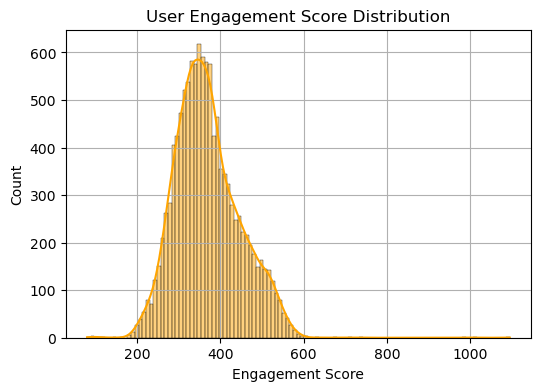

C:\Users\Sarayu Polepalli\AppData\Local\Temp\ipykernel_30012\672088463.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='engagement_score', data=data_cleaned, palette='pastel')


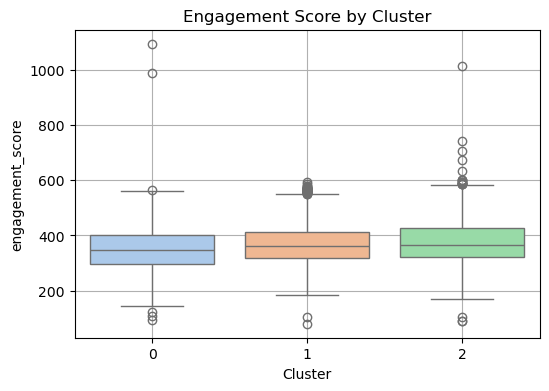

In [22]:
# Engagement score distribution
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['engagement_score'], kde=True, color='orange')
plt.title('User Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Cluster', y='engagement_score', data=data_cleaned, palette='pastel')
plt.title('Engagement Score by Cluster')
plt.grid(True)
plt.show()

In [23]:
# Update numeric columns before heatmap to include any new ones like 'engagement_score'
numeric_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['UserID', 'Taken_product_flag']]

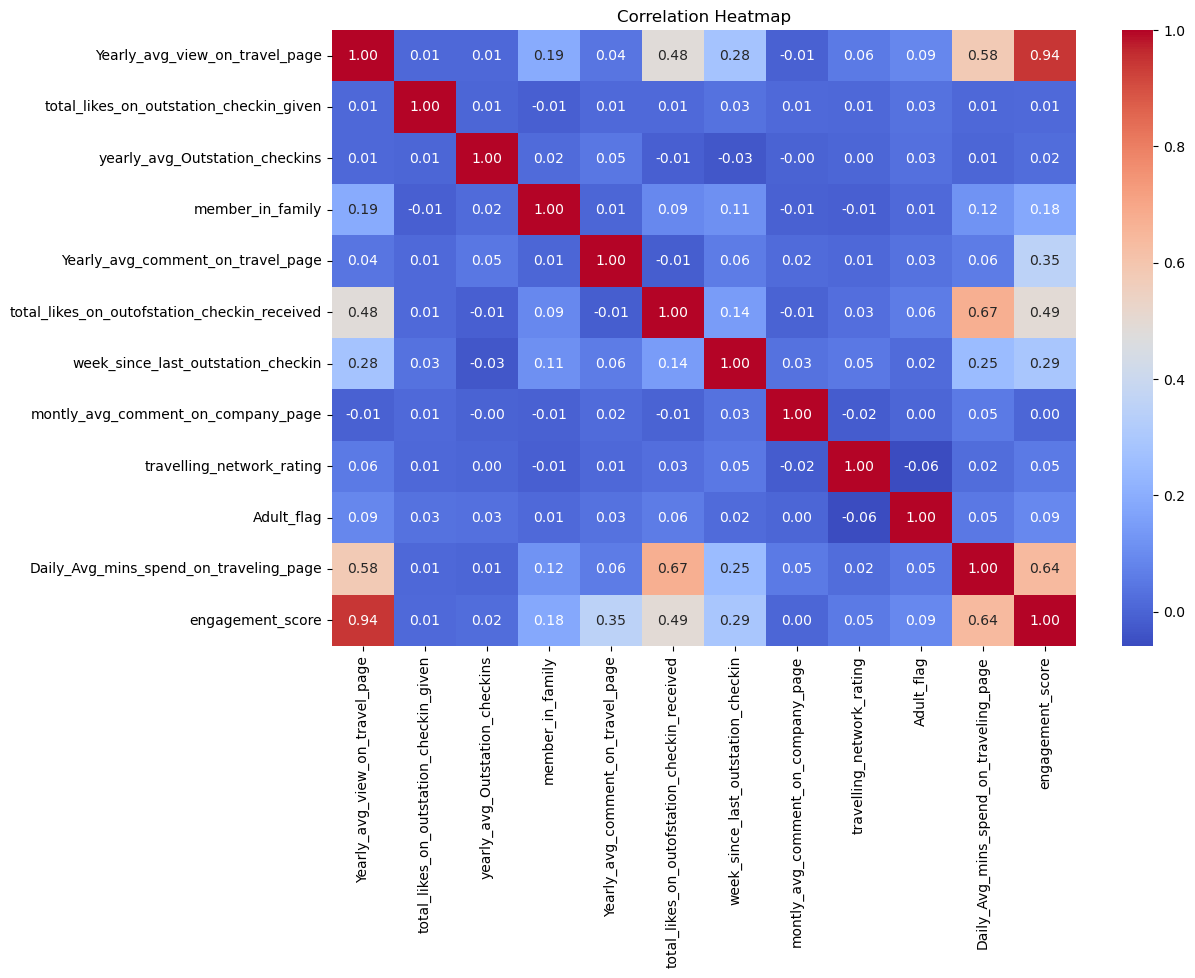

In [24]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

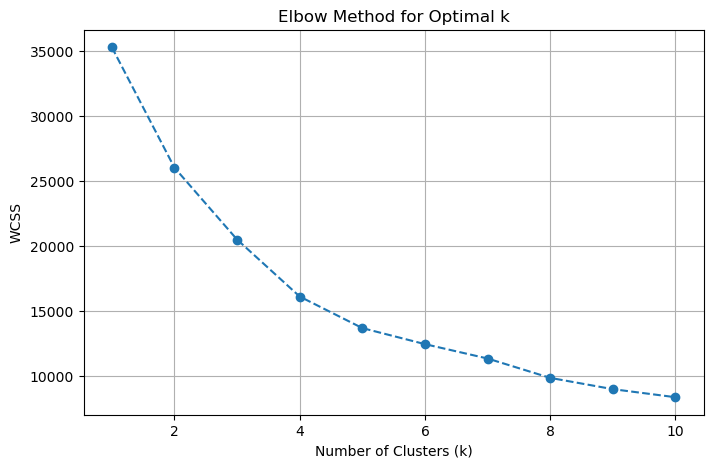

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select Features
selected_features = ['member_in_family', 'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page']

X = data_cleaned[selected_features]

# 2. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Find Optimal Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 4. Apply KMeans with chosen k
k = 3  # based on Elbow curve
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# 5. Add Cluster Labels to Data
data_cleaned['Cluster'] = cluster_labels


Cluster-wise feature averages:

         member_in_family  travelling_network_rating  \
Cluster                                                
0                    1.57                       3.01   
1                    3.31                       1.48   
2                    3.49                       3.47   

         Daily_Avg_mins_spend_on_traveling_page  
Cluster                                          
0                                         12.42  
1                                         13.84  
2                                         14.70  


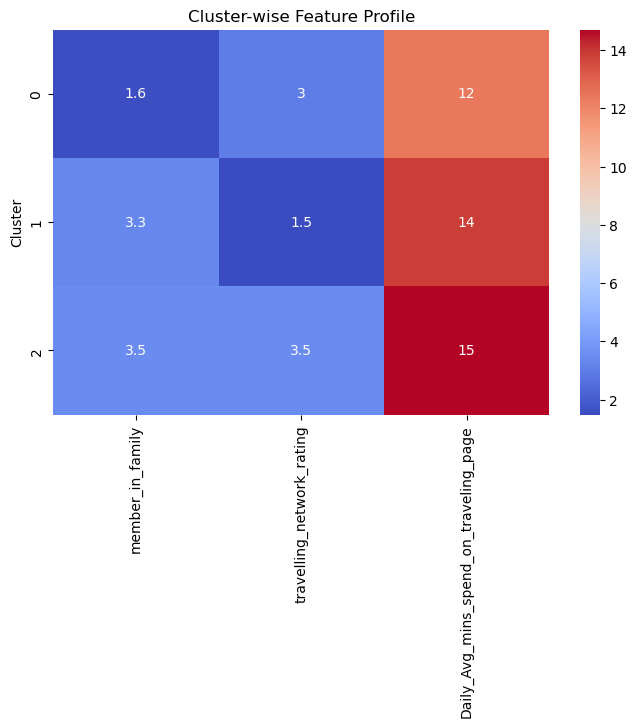

In [26]:
# Cluster profile - mean values of selected features
selected_features = ['member_in_family', 'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page']
cluster_profile = data_cleaned.groupby('Cluster')[selected_features].mean().round(2)
print("\nCluster-wise feature averages:\n")
print(cluster_profile)

# Optional: Heatmap of cluster profile
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_profile, annot=True, cmap='coolwarm')
plt.title('Cluster-wise Feature Profile')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('Taken_product', axis=1)
y = df['Taken_product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# Get column types
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [29]:
from sklearn.impute import SimpleImputer
# Numeric imputer
num_imputer = SimpleImputer(strategy='mean')
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)


In [30]:
# Categorical imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

In [31]:
# Concatenate back the data
X_train_imputed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_imputed = pd.concat([X_test_num, X_test_cat], axis=1)

# Apply one-hot encoding on categorical columns
X_train_encoded = pd.get_dummies(X_train_imputed, columns=cat_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_imputed, columns=cat_cols, drop_first=True)

# Make sure both train and test have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [32]:
print("Missing values in X_train_imputed:\n", X_train_imputed.isnull().sum())
print("Missing values in X_test_imputed:\n", X_test_imputed.isnull().sum())

print("\nSample of imputed training data:")
print(X_train_imputed.head())

Missing values in X_train_imputed:
 UserID                                          0
Yearly_avg_view_on_travel_page                  0
total_likes_on_outstation_checkin_given         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
montly_avg_comment_on_company_page              0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
preferred_device                                0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
following_company_page                          0
working_flag                                    0
dtype: int64
Missing values in X_test_imputed:
 UserID                                          0
Yearly_avg_view_on_travel_page                  0
total_likes_on_o

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({'No': 7891, 'Yes': 1517})
After SMOTE: Counter({'No': 7891, 'Yes': 7891})


C:\Users\Sarayu Polepalli\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [35]:
# Number of users in each cluster
cluster_counts = data_cleaned['Cluster'].value_counts()
print("Number of users in each cluster:\n")
print(cluster_counts)

Number of users in each cluster:

Cluster
2    4878
1    3743
0    3139
Name: count, dtype: int64


In [36]:
# Cluster profile - mean values of selected features
cluster_profile = data_cleaned.groupby('Cluster')[[
    'member_in_family', 
    'travelling_network_rating', 
    'Daily_Avg_mins_spend_on_traveling_page'
]].mean().round(2)

print("\nCluster-wise feature averages:\n")
print(cluster_profile)


Cluster-wise feature averages:

         member_in_family  travelling_network_rating  \
Cluster                                                
0                    1.57                       3.01   
1                    3.31                       1.48   
2                    3.49                       3.47   

         Daily_Avg_mins_spend_on_traveling_page  
Cluster                                          
0                                         12.42  
1                                         13.84  
2                                         14.70  


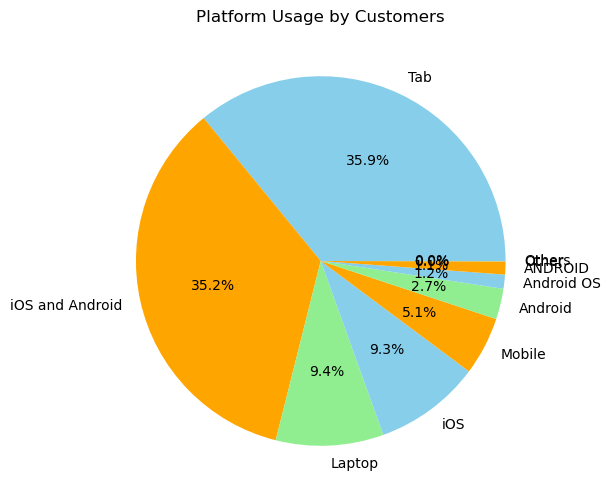

In [37]:
import matplotlib.pyplot as plt

# Count values for preferred device
device_counts = data_cleaned['preferred_device'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Platform Usage by Customers')
plt.show()

* more customers are only used tab for their references and the second place comes to ios and android.

# Building model for supervised learning

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter

In [39]:
data_cleaned['Taken_product_flag'] = data_cleaned['Taken_product'].map({'Yes': 1, 'No': 0})

In [40]:
# Select features and target
features = [
    'member_in_family',
    'travelling_network_rating',
    'Daily_Avg_mins_spend_on_traveling_page',
    'yearly_avg_Outstation_checkins',
    'Yearly_avg_view_on_travel_page',
    'total_likes_on_outstation_checkin_given'
]
target = 'Taken_product_flag'  # Already created in your data_cleaned

X = data_cleaned[features]
y = data_cleaned[target]

In [41]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Impute
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({0: 6905, 1: 1327})
After SMOTE: Counter({0: 6905, 1: 6905})


C:\Users\Sarayu Polepalli\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
print("\n 1. Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, zero_division=1))


 1. Logistic Regression
Accuracy: 0.8390
Confusion Matrix:
 [[2959    0]
 [ 568    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2959
           1       1.00      0.00      0.00       569

    accuracy                           0.84      3528
   macro avg       0.92      0.50      0.46      3528
weighted avg       0.86      0.84      0.77      3528



In [43]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_sm, y_train_sm)
y_pred_lr = lr_model.predict(X_test_scaled)

print("\nLogistic Regression (SMOTE)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, zero_division=1))


Logistic Regression (SMOTE)
Accuracy: 0.5848
Confusion Matrix:
 [[1687 1272]
 [ 193  376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.57      0.70      2959
           1       0.23      0.66      0.34       569

    accuracy                           0.58      3528
   macro avg       0.56      0.62      0.52      3528
weighted avg       0.79      0.58      0.64      3528



In [44]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print("\n 2. Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))


 2. Random Forest
Accuracy: 0.9663
Confusion Matrix:
 [[2954    5]
 [ 114  455]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2959
           1       0.99      0.80      0.88       569

    accuracy                           0.97      3528
   macro avg       0.98      0.90      0.93      3528
weighted avg       0.97      0.97      0.96      3528



In [45]:
#Random forest with SMOTE data



from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

y_pred_rf = rf_model.predict(X_test_scaled)

print("\n b.Random Forest with SMOTE")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))


 b.Random Forest with SMOTE
Accuracy: 0.9620
Confusion Matrix:
 [[2917   42]
 [  92  477]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2959
           1       0.92      0.84      0.88       569

    accuracy                           0.96      3528
   macro avg       0.94      0.91      0.93      3528
weighted avg       0.96      0.96      0.96      3528



In [46]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("\n 3. XGBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, zero_division=1))


 3. XGBoost
Accuracy: 0.9677
Confusion Matrix:
 [[2950    9]
 [ 105  464]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2959
           1       0.98      0.82      0.89       569

    accuracy                           0.97      3528
   macro avg       0.97      0.91      0.94      3528
weighted avg       0.97      0.97      0.97      3528



C:\Users\Sarayu Polepalli\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:45:19] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [47]:
#XGBoost with SMOTE data


from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("\n c. XGBoost with SMOTE")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, zero_division=1))


 c. XGBoost with SMOTE
Accuracy: 0.9558
Confusion Matrix:
 [[2896   63]
 [  93  476]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2959
           1       0.88      0.84      0.86       569

    accuracy                           0.96      3528
   macro avg       0.93      0.91      0.92      3528
weighted avg       0.96      0.96      0.96      3528



C:\Users\Sarayu Polepalli\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:47:01] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect metrics
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr, zero_division=1),
        precision_score(y_test, y_pred_rf, zero_division=1),
        precision_score(y_test, y_pred_xgb, zero_division=1)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr, zero_division=1),
        recall_score(y_test, y_pred_rf, zero_division=1),
        recall_score(y_test, y_pred_xgb, zero_division=1)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr, zero_division=1),
        f1_score(y_test, y_pred_rf, zero_division=1),
        f1_score(y_test, y_pred_xgb, zero_division=1)
    ]
}

# Display as DataFrame
import pandas as pd
results_df = pd.DataFrame(metrics)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.584751   0.228155  0.660808  0.339197
1        Random Forest  0.962018   0.919075  0.838313  0.876838
2              XGBoost  0.955782   0.883117  0.836555  0.859206


In [49]:
#evaluation table of metrics with SMOTE data


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Collect metrics after SMOTE
metrics_smote = {
    'Model': ['Logistic Regression (SMOTE)', 'Random Forest (SMOTE)', 'XGBoost (SMOTE)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr, zero_division=1),
        precision_score(y_test, y_pred_rf, zero_division=1),
        precision_score(y_test, y_pred_xgb, zero_division=1)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr, zero_division=1),
        recall_score(y_test, y_pred_rf, zero_division=1),
        recall_score(y_test, y_pred_xgb, zero_division=1)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr, zero_division=1),
        f1_score(y_test, y_pred_rf, zero_division=1),
        f1_score(y_test, y_pred_xgb, zero_division=1)
    ]
}

# Display as DataFrame
results_smote_df = pd.DataFrame(metrics_smote)
print("\nModel Evaluation Metrics (Using SMOTE):\n")
print(results_smote_df)



Model Evaluation Metrics (Using SMOTE):

                         Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression (SMOTE)  0.584751   0.228155  0.660808  0.339197
1        Random Forest (SMOTE)  0.962018   0.919075  0.838313  0.876838
2              XGBoost (SMOTE)  0.955782   0.883117  0.836555  0.859206


In [51]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_sm))

Class distribution before SMOTE: Counter({0: 6905, 1: 1327})
Class distribution after SMOTE: Counter({0: 6905, 1: 6905})


C:\Users\Sarayu Polepalli\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Without SMOTE
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression (Without SMOTE)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, zero_division=1))

# With SMOTE
lr_sm = LogisticRegression(random_state=42)
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_lr_sm = lr_sm.predict(X_test_scaled)

print("Logistic Regression (With SMOTE)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_sm):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_sm))
print(classification_report(y_test, y_pred_lr_sm, zero_division=1))

Logistic Regression (Without SMOTE)
Accuracy: 0.8390
Confusion Matrix:
 [[2959    0]
 [ 568    1]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2959
           1       1.00      0.00      0.00       569

    accuracy                           0.84      3528
   macro avg       0.92      0.50      0.46      3528
weighted avg       0.86      0.84      0.77      3528

Logistic Regression (With SMOTE)
Accuracy: 0.5848
Confusion Matrix:
 [[1687 1272]
 [ 193  376]]
              precision    recall  f1-score   support

           0       0.90      0.57      0.70      2959
           1       0.23      0.66      0.34       569

    accuracy                           0.58      3528
   macro avg       0.56      0.62      0.52      3528
weighted avg       0.79      0.58      0.64      3528



In [53]:
from sklearn.ensemble import RandomForestClassifier

# Without SMOTE
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest (Without SMOTE)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=1))

# With SMOTE
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rf_sm.predict(X_test_scaled)

print("Random Forest (With SMOTE)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_sm):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_sm))
print(classification_report(y_test, y_pred_rf_sm, zero_division=1))

Random Forest (Without SMOTE)
Accuracy: 0.9663
Confusion Matrix:
 [[2954    5]
 [ 114  455]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2959
           1       0.99      0.80      0.88       569

    accuracy                           0.97      3528
   macro avg       0.98      0.90      0.93      3528
weighted avg       0.97      0.97      0.96      3528

Random Forest (With SMOTE)
Accuracy: 0.9620
Confusion Matrix:
 [[2917   42]
 [  92  477]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2959
           1       0.92      0.84      0.88       569

    accuracy                           0.96      3528
   macro avg       0.94      0.91      0.93      3528
weighted avg       0.96      0.96      0.96      3528



In [54]:
from xgboost import XGBClassifier

# Without SMOTE
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("XGBoost (Without SMOTE)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, zero_division=1))

# With SMOTE
xgb_sm = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_sm.fit(X_train_sm, y_train_sm)
y_pred_xgb_sm = xgb_sm.predict(X_test_scaled)

print("XGBoost (With SMOTE)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_sm):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_sm))
print(classification_report(y_test, y_pred_xgb_sm, zero_division=1))

C:\Users\Sarayu Polepalli\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:54:44] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Sarayu Polepalli\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:54:44] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (Without SMOTE)
Accuracy: 0.9677
Confusion Matrix:
 [[2950    9]
 [ 105  464]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2959
           1       0.98      0.82      0.89       569

    accuracy                           0.97      3528
   macro avg       0.97      0.91      0.94      3528
weighted avg       0.97      0.97      0.97      3528

XGBoost (With SMOTE)
Accuracy: 0.9558
Confusion Matrix:
 [[2896   63]
 [  93  476]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2959
           1       0.88      0.84      0.86       569

    accuracy                           0.96      3528
   macro avg       0.93      0.91      0.92      3528
weighted avg       0.96      0.96      0.96      3528



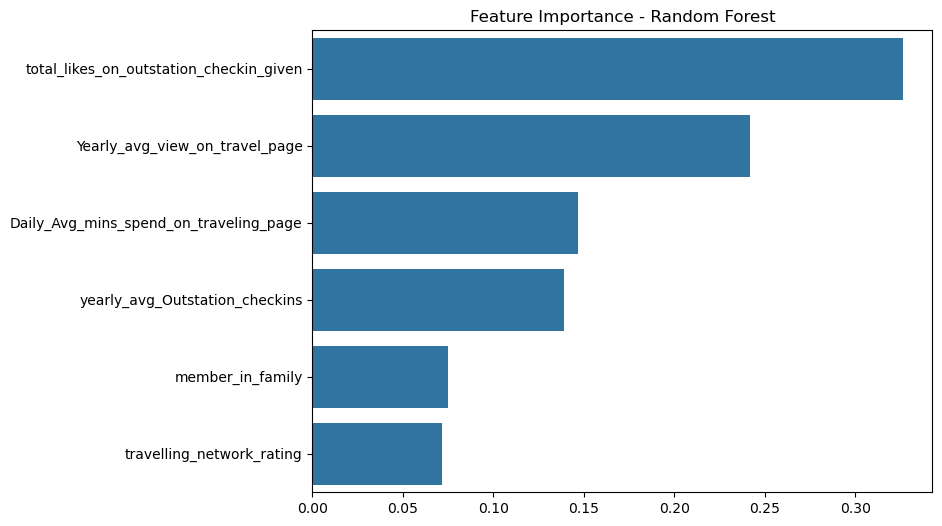

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = features

importances = rf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title('Feature Importance - Random Forest')
plt.show()

In [56]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

models = ['LogReg', 'RandomForest', 'XGBoost']
results = []

for name, y_pred, model_type in [
    ('LogReg Without SMOTE', y_pred_lr, 'No SMOTE'),
    ('LogReg With SMOTE', y_pred_lr_sm, 'SMOTE'),
    ('RandomForest Without SMOTE', y_pred_rf, 'No SMOTE'),
    ('RandomForest With SMOTE', y_pred_rf_sm, 'SMOTE'),
    ('XGBoost Without SMOTE', y_pred_xgb, 'No SMOTE'),
    ('XGBoost With SMOTE', y_pred_xgb_sm, 'SMOTE')
]:
    results.append({
        'Model': name,
        'SMOTE': model_type,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=1),
        'Recall': recall_score(y_test, y_pred, zero_division=1),
        'F1 Score': f1_score(y_test, y_pred, zero_division=1)
    })

results_df = pd.DataFrame(results)
print(results_df)

                        Model     SMOTE  Accuracy  Precision    Recall  \
0        LogReg Without SMOTE  No SMOTE  0.839002   1.000000  0.001757   
1           LogReg With SMOTE     SMOTE  0.584751   0.228155  0.660808   
2  RandomForest Without SMOTE  No SMOTE  0.966270   0.989130  0.799649   
3     RandomForest With SMOTE     SMOTE  0.962018   0.919075  0.838313   
4       XGBoost Without SMOTE  No SMOTE  0.967687   0.980973  0.815466   
5          XGBoost With SMOTE     SMOTE  0.955782   0.883117  0.836555   

   F1 Score  
0  0.003509  
1  0.339197  
2  0.884354  
3  0.876838  
4  0.890595  
5  0.859206  
